### Урок 1. Вводный#

### -- Автор: Шенк Евгений Станиславович

### Задание 1.

В проектируемой локальной сети есть заданное количество компьютеров.  
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров.  
Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.  
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.  
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.  
1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.
2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*

In [1]:
import numpy as np    
import math
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
opt_link_price = 12  # стоимостью оптоволокна, р/м
twisted_pair_price = 30  # стоимостью витой пары, р/м
router_price = 500 # стоимостью маршрутизатора

In [3]:
# Возьмем некоторое количество комп-в с координатами x и y, и сервер
server_coord = [0, 0]
x0 = [30, 12]
x1 = [10, 17]
x2 = [5, 20]
x3 = [20, 5]
x_list = [x0, x1, x2, x3]

In [4]:
# Все варианты установки роутера
max_coord = max(itertools.chain.from_iterable(x_list))
router_coord = [np.arange(0, max_coord, 1), np.arange(0, max_coord, 1)]

### Целевая функция:
Стоимость = минимум из стоимость с роутером и стоимость без роутера  
Стоимость без роутера = сумма растояний от комп-в до сервера * стоимость витой пары  
Стоимость с роутером = расстояние от сервера до роутера * стоимость оптоволокна + расстояние от комп-в до роутера * стоимость витой пары + стоимость роутера  

In [5]:
grid = []
result = [0, 0, 0]
without_r_price = sum([math.sqrt((x[0]-server_coord[0])**2 + (x[1]-server_coord[1])**2) * twisted_pair_price for x in x_list])
price = without_r_price
for r0 in router_coord[0]:
    for r1 in router_coord[1]:
        serv_to_r_price = math.sqrt((r0 - server_coord[0])**2 + (r1 - server_coord[1])**2) * opt_link_price
        comp_to_r_price = 0
        
        for x in x_list:
            comp_to_r_price += math.sqrt((x[0]-r0)**2 + (x[1]-r1)**2) * twisted_pair_price
        total = serv_to_r_price + comp_to_r_price + router_price
        grid.append([total, r0, r1]) # Сетка стоимостей и координат роутера
        
        if total < price:
            price = total
            result = [total, r0, r1] # Стоимость и место установки роутера
            
if (result[1] == 0) and (result[2] == 0):
    grid = [[without_r_price, x[1], x[2]] for x in grid]

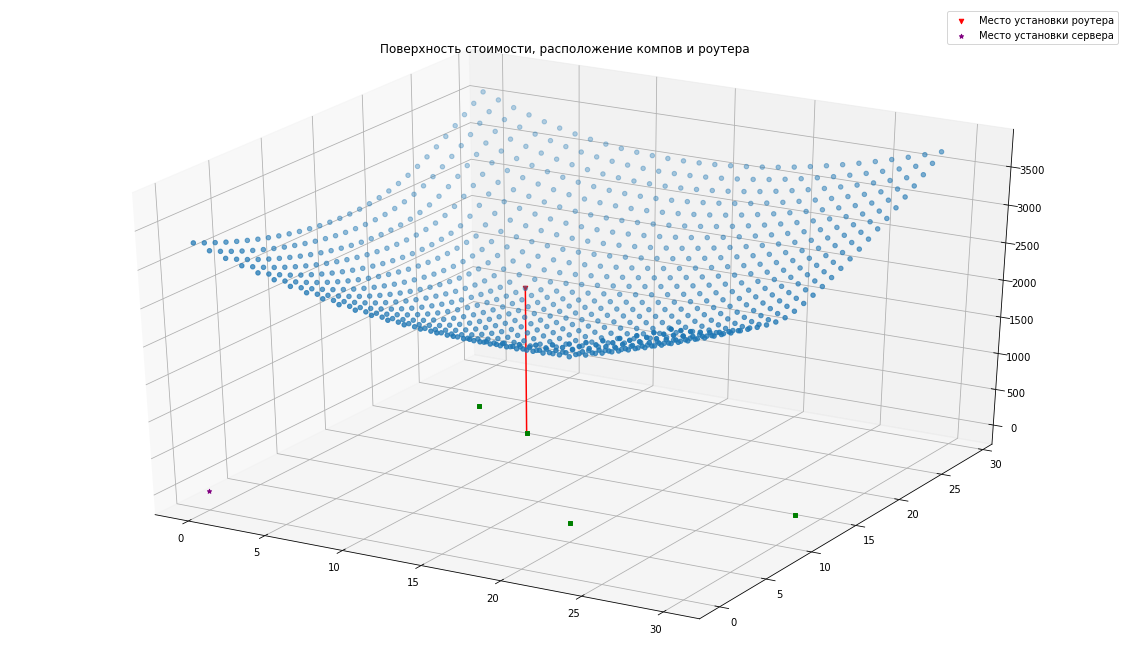

In [6]:
Z = np.array([x[0] for x in grid])
X = np.array([x[1] for x in grid])
Y = np.array([x[2] for x in grid])
fig = plt.figure()
fig.set_size_inches(20,12)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)

for x in x_list:
    ax.scatter(x[0], x[1], 0, color='green', marker='s')

if (result[1] != 0) and (result[2] != 0):
    ax.scatter(result[1], result[2], result[0], color='red', marker='v', label='Место установки роутера')
    ax.plot([result[1], result[1]], [result[2], result[2]], [0, result[0]], color='red')

ax.scatter(server_coord[0], server_coord[1], 0, color='purple', marker='*', label='Место установки сервера')    
    
ax.set_title('Поверхность стоимости, расположение компов и роутера')
ax.legend()
    
plt.show()